## 1) Plot all rmse results

Models used: GPT-2 (base), LSTM, DeepSeek-coder-7b, BERT-small
Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_1\experiment1_rmse_sig_final.pdf


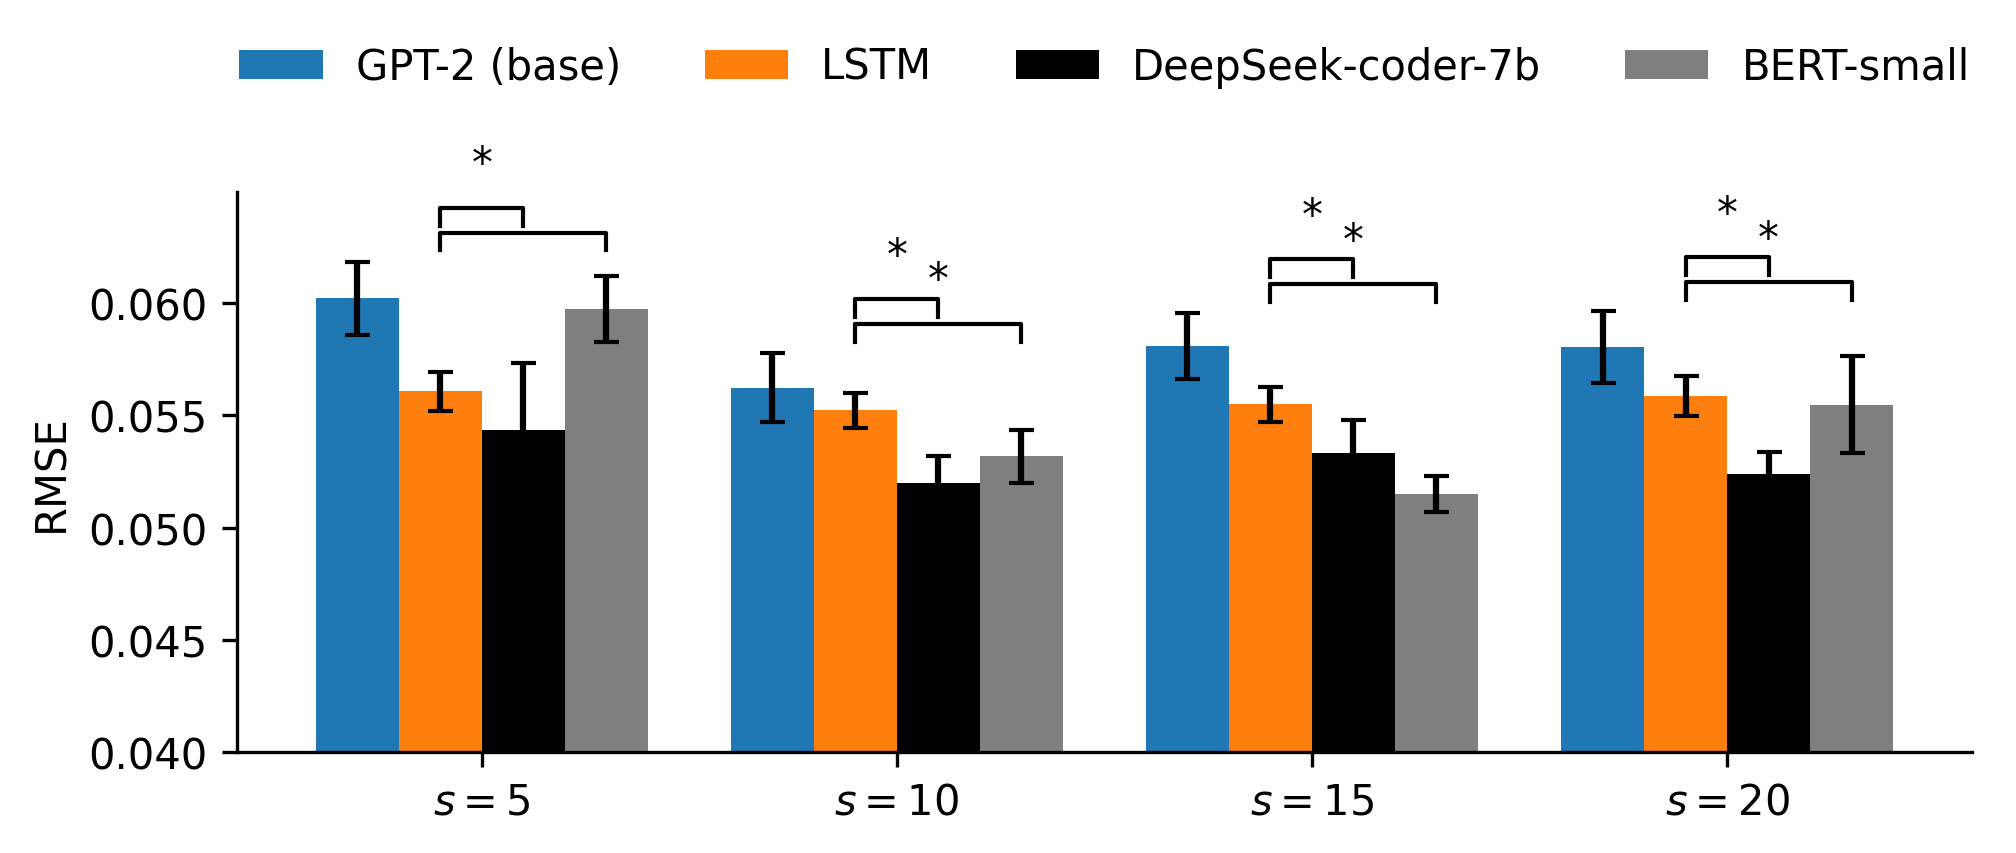

In [1]:
import os 
import numpy as np 
import matplotlib .pyplot as plt 
from scipy .stats import mannwhitneyu ,sem 

RESULTS_ROOT =os .path .abspath (
os .path .join (os .getcwd (),os .pardir ,os .pardir ,os .pardir ,
"external_data","nlp4neuro","results_april30","experiment_1")
)
fish_list =[9 ,10 ,11 ,12 ,13 ]
seq_lengths =[5 ,10 ,15 ,20 ]
num_runs =10 

model_map ={
"GPT-2 (base)":("gpt2_pretrained","#1f77b4"),
"LSTM":("lstm","#ff7f0e"),
"DeepSeek-coder-7b":("deepseek_moe","#000000"),
"BERT-small":("bert","#7f7f7f"),
}
model_names =list (model_map .keys ())
print ("Models used:",", ".join (model_names ))

rmse_data ={m :{s :[]for s in seq_lengths }for m in model_names }

for fish in fish_list :
    gt_path =os .path .join (RESULTS_ROOT ,f"fish{fish}",f"fish{fish}_final_predictions_groundtruth_test.npy")
    y_true =np .load (gt_path )
    for run in range (1 ,num_runs +1 ):
        for seq in seq_lengths :
            seq_dir =os .path .join (RESULTS_ROOT ,f"fish{fish}",f"run_{run}",f"seq_{seq}")
            if not os .path .isdir (seq_dir ):
                continue 
            for m in model_names :
                key =model_map [m ][0 ]
                f =os .path .join (seq_dir ,f"fish{fish}_final_predictions_{key}_test_run{run}.npy")
                if os .path .isfile (f ):
                    preds =np .load (f )
                    rmse =np .sqrt (np .mean ((preds -y_true )**2 ))
                    rmse_data [m ][seq ].append (rmse )

means ,errs ,pvals ={},{},{}
for m in model_names :
    means [m ]=[np .mean (rmse_data [m ][s ])for s in seq_lengths ]
    errs [m ]=[sem (rmse_data [m ][s ])for s in seq_lengths ]

for seq in seq_lengths :
    lstm_vals =rmse_data ["LSTM"][seq ]
    pvals [seq ]={}
    for other in ["BERT-small","DeepSeek-coder-7b"]:
        stat ,p =mannwhitneyu (lstm_vals ,rmse_data [other ][seq ],alternative ="two-sided")
        pvals [seq ][other ]=p 

gap =0.0005 
h =0.0008 
y_bases =[
max (means [m ][j ]+errs [m ][j ]for m in model_names )+gap 
for j in range (len (seq_lengths ))
]

plt .rcParams ["pdf.fonttype"]=42 
fig ,ax =plt .subplots (figsize =(7 ,3 ),dpi =300 )

x =np .arange (len (seq_lengths ))
bw =0.8 /len (model_names )

for idx ,m in enumerate (model_names ):
    off =(idx -len (model_names )/2 )*bw +bw /2 
    ax .bar (x +off ,
    means [m ],
    width =bw ,
    yerr =errs [m ],
    capsize =3 ,
    label =m ,
    color =model_map [m ][1 ])

ax .set_ylim (0.04 ,None )
ax .set_ylabel ("RMSE")
ax .set_xticks (x )
ax .set_xticklabels ([f"$s={s}$"for s in seq_lengths ])
ax .spines ["top"].set_visible (False )
ax .spines ["right"].set_visible (False )

ax .legend (ncol =len (model_names ),
frameon =False ,
bbox_to_anchor =(0 ,1.12 ,1 ,0 ),
loc ="lower center")

def draw_bracket (x1 ,x2 ,y ,h ,p ):

    ax .plot ([x1 ,x1 ,x2 ,x2 ],
    [y ,y +h ,y +h ,y ],
    lw =1 ,c ="k")

    if p <0.05 :
        ax .text ((x1 +x2 )/2 ,
        y +h +0.001 ,
        "*",
        ha ="center",
        va ="bottom",
        fontsize =10 )

for j ,seq in enumerate (seq_lengths ):

    y_base =y_bases [j ]

    idx_l =model_names .index ("LSTM")
    idx_b =model_names .index ("BERT-small")
    idx_d =model_names .index ("DeepSeek-coder-7b")

    x_l =x [j ]+((idx_l -len (model_names )/2 )*bw +bw /2 )
    x_b =x [j ]+((idx_b -len (model_names )/2 )*bw +bw /2 )
    x_d =x [j ]+((idx_d -len (model_names )/2 )*bw +bw /2 )

    draw_bracket (x_l ,x_b ,y_base ,h ,pvals [seq ]["BERT-small"])
    draw_bracket (x_l ,x_d ,y_base +h +0.0003 ,h ,pvals [seq ]["DeepSeek-coder-7b"])

plt .tight_layout ()
out_file =os .path .join (RESULTS_ROOT ,"experiment1_rmse_sig_final.pdf")
plt .savefig (out_file ,dpi =300 ,bbox_inches ="tight")
print ("Saved to",out_file )


C:\Users\jacob\AppData\Local\Temp\ipykernel_22560\3963392535.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_1\experiment1_rmse_sig_final.pdf


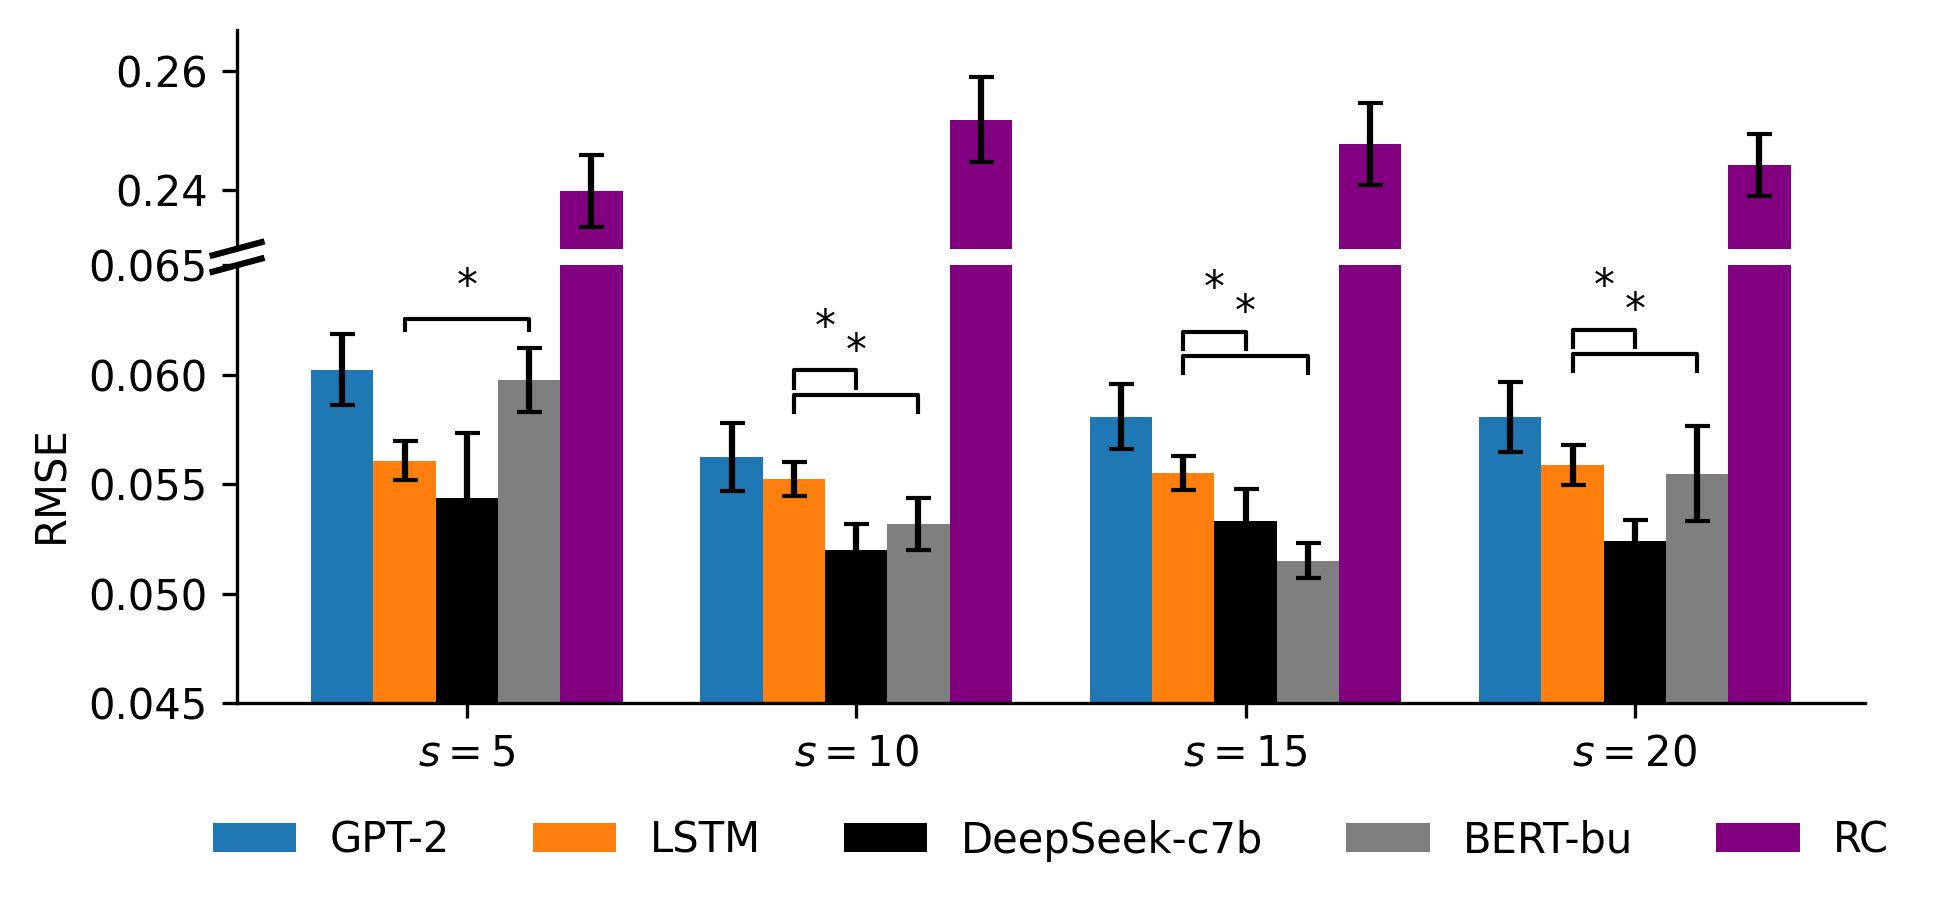

In [47]:
import os 
import numpy as np 
import matplotlib .pyplot as plt 
from scipy .stats import mannwhitneyu ,sem 

RESULTS_ROOT =os .path .abspath (
os .path .join (os .getcwd (),os .pardir ,os .pardir ,os .pardir ,
"external_data","nlp4neuro","results_april30","experiment_1")
)
fish_list =[9 ,10 ,11 ,12 ,13 ]
seq_lengths =[5 ,10 ,15 ,20 ]
num_runs =10 

model_map ={
"GPT-2 (base)":("gpt2_pretrained","#1f77b4","GPT-2"),
"LSTM":("lstm","#ff7f0e","LSTM"),
"DeepSeek-coder-7b":("deepseek_moe","#000000","DeepSeek-c7b"),
"BERT-small":("bert","#7f7f7f","BERT-bu"),
"RC":("reservoir","purple","RC"),
}
model_names =list (model_map .keys ())

rmse_data ={m :{s :[]for s in seq_lengths }for m in model_names }
for fish in fish_list :
    y_true =np .load (os .path .join (
    RESULTS_ROOT ,f"fish{fish}",
    f"fish{fish}_final_predictions_groundtruth_test.npy"
    ))
    for run in range (1 ,num_runs +1 ):
        for s in seq_lengths :
            d =os .path .join (RESULTS_ROOT ,f"fish{fish}",f"run_{run}",f"seq_{s}")
            if not os .path .isdir (d ):continue 
            for m in model_names :
                key =model_map [m ][0 ]
                fp =os .path .join (d ,f"fish{fish}_final_predictions_{key}_test_run{run}.npy")
                if os .path .isfile (fp ):
                    preds =np .load (fp )
                    rmse_data [m ][s ].append (np .sqrt (np .mean ((preds -y_true )**2 )))

means ,errs ,pvals ={},{},{}
for m in model_names :
    means [m ]=[np .mean (rmse_data [m ][s ])for s in seq_lengths ]
    errs [m ]=[sem (rmse_data [m ][s ])for s in seq_lengths ]

for s in seq_lengths :
    lst =rmse_data ["LSTM"][s ]
    pvals [s ]={
    "BERT-small":mannwhitneyu (lst ,rmse_data ["BERT-small"][s ])[1 ],
    "DeepSeek-coder-7b":mannwhitneyu (lst ,rmse_data ["DeepSeek-coder-7b"][s ])[1 ],
    }

plt .rcParams ["pdf.fonttype"]=42 
fig ,(ax_hi ,ax_lo )=plt .subplots (
2 ,1 ,sharex =True ,
figsize =(7 ,3.4 ),dpi =300 ,
gridspec_kw ={"height_ratios":[1 ,2 ],"hspace":0.05 }
)

x =np .arange (len (seq_lengths ))
bw =0.8 /len (model_names )

for i ,m in enumerate (model_names ):
    off =(i -len (model_names )/2 )*bw +bw /2 
    col ,lbl =model_map [m ][1 ],model_map [m ][2 ]

    ax_lo .bar (
    x +off ,
    means [m ],
    width =bw ,
    yerr =errs [m ]if m !="RC"else None ,
    capsize =3 if m !="RC"else 0 ,
    color =col ,
    label =lbl 
    )

    if m =="RC":
        ax_hi .bar (
        x +off ,
        means [m ],
        width =bw ,
        yerr =errs [m ],
        capsize =3 ,
        color =col ,
        label ="_nolegend_"
        )

ax_lo .set_ylim (0.045 ,0.065 )
ax_hi .set_ylim (0.23 ,max (means ["RC"])+errs ["RC"][-1 ]+0.01 )

for ax in (ax_hi ,ax_lo ):
    ax .spines ["right"].set_visible (False )
    ax .spines ["top"].set_visible (False )
ax_hi .spines ["bottom"].set_visible (False )
ax_hi .tick_params (axis ='x',bottom =False ,labelbottom =False )

d =0.015 
ax_lo .plot ((-d ,+d ),(1 -d ,1 +d ),transform =ax_lo .transAxes ,color ="k",clip_on =False )
ax_hi .plot ((-d ,+d ),(-2 *d ,+2 *d ),transform =ax_hi .transAxes ,color ="k",clip_on =False )

ax_lo .set_ylabel ("RMSE")
ax_lo .set_xticks (x )
ax_lo .set_xticklabels ([f"$s={s}$"for s in seq_lengths ])

sig_gap =0.0005 
sig_hgt =0.0008 
sig_star_off =0.001 
sig_between =0.0003 

sig_overrides ={
5 :dict (gap =0.0002 ,h =0.0005 ,star_off =0.0005 )
}

def draw_bracket (ax ,x1 ,x2 ,y ,h ,p ,
star_off =sig_star_off ,always =False ):
    if always or p <0.05 :
        ax .plot ([x1 ,x1 ,x2 ,x2 ],[y ,y +h ,y +h ,y ],
        lw =1 ,c ="k")
        ax .text ((x1 +x2 )/2 ,y +h +star_off ,
        "*",ha ="center",va ="bottom",fontsize =10 )

iL =model_names .index ("LSTM")
iB =model_names .index ("BERT-small")
iD =model_names .index ("DeepSeek-coder-7b")

for j ,s in enumerate (seq_lengths ):
    params =sig_overrides .get (s ,
    dict (gap =sig_gap ,h =sig_hgt ,star_off =sig_star_off ))
    y0 =max (means [m ][j ]+errs [m ][j ]
    for m in model_names if m !="RC")+params ["gap"]
    y0 =min (y0 ,ax_lo .get_ylim ()[1 ]-params ["h"]-0.0002 )

    xL =x [j ]+((iL -len (model_names )/2 )*bw +bw /2 )
    xB =x [j ]+((iB -len (model_names )/2 )*bw +bw /2 )
    xD =x [j ]+((iD -len (model_names )/2 )*bw +bw /2 )

    if s ==5 :

        draw_bracket (ax_lo ,xL ,xB ,y0 ,
        params ["h"],pvals [s ]["BERT-small"],
        star_off =params ["star_off"],
        always =True )
    else :

        draw_bracket (ax_lo ,xL ,xB ,y0 ,
        params ["h"],pvals [s ]["BERT-small"])

        draw_bracket (ax_lo ,xL ,xD ,
        y0 +params ["h"]+sig_between ,
        params ["h"],pvals [s ]["DeepSeek-coder-7b"])

ax_lo .legend (ncol =len (model_names ),frameon =False ,
loc ="upper center",bbox_to_anchor =(0.5 ,-0.18 ))
plt .subplots_adjust (bottom =0.22 )

out_file =os .path .join (RESULTS_ROOT ,
"experiment1_rmse_sig_final.pdf")
plt .tight_layout ()
plt .savefig (out_file ,bbox_inches ="tight")
print ("Saved to",out_file )


## 2) Plot pre- vs un-trained

Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_2\pretrained_vs_untrained_exp1_exp2.pdf


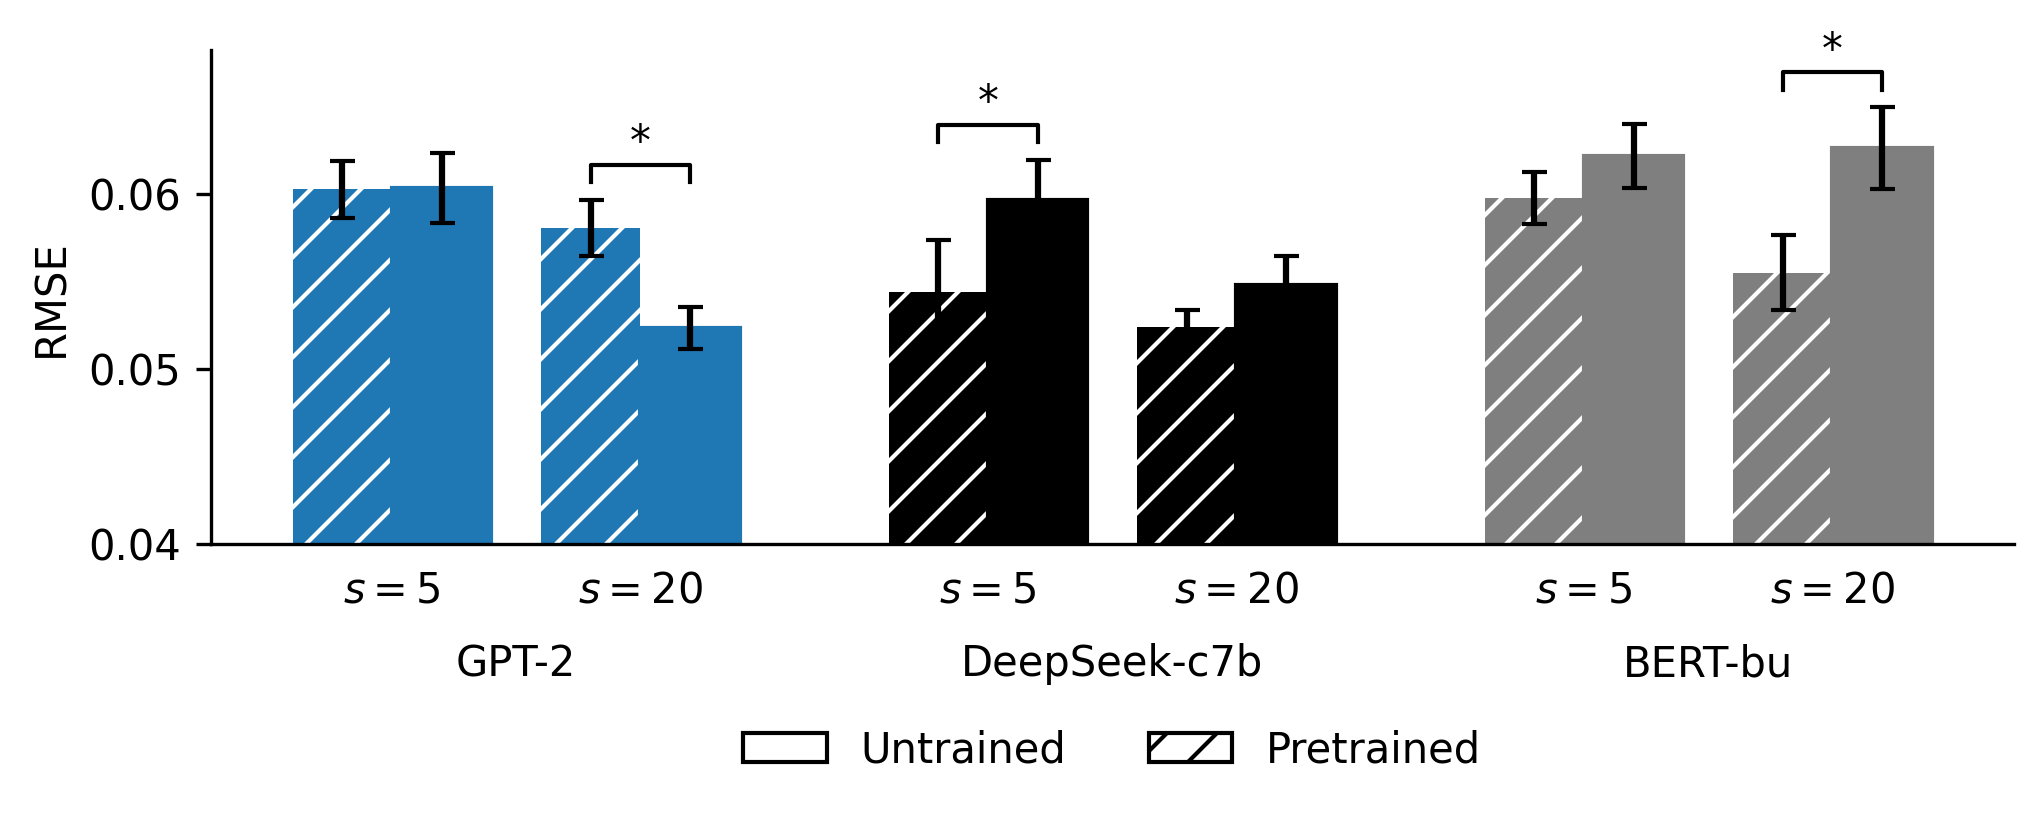

In [62]:
import os 
import numpy as np 
import matplotlib .pyplot as plt 
from scipy .stats import sem ,wilcoxon 
import matplotlib .patches as mpatches 

EXP1_ROOT =os .path .abspath (
os .path .join (os .getcwd (),os .pardir ,os .pardir ,os .pardir ,
"external_data","nlp4neuro","results_april30","experiment_1")
)
EXP2_ROOT =os .path .abspath (
os .path .join (os .getcwd (),os .pardir ,os .pardir ,os .pardir ,
"external_data","nlp4neuro","results_april30","experiment_2")
)
fish_list =[9 ,10 ,11 ,12 ,13 ]
seq_lengths =[5 ,20 ]
model_info ={
"GPT-2 (base)":dict (pre_key ="gpt2_pretrained",stub ="GPT2",c ="#1f77b4"),
"DeepSeek-coder-7b":dict (pre_key ="deepseek_moe",stub ="DeepSeek",c ="#000000"),
"BERT-small":dict (pre_key ="bert",stub ="BERT",c ="#7f7f7f"),
}
states ={"prtr":"Pretrained","untr":"Untrained"}

def load_gt (fid ):
    for root in (EXP1_ROOT ,EXP2_ROOT ):
        for cand in (f"fish{fid}_test_groundtruth.npy",
        f"fish{fid}_groundtruth_test.npy"):
            fp =os .path .join (root ,cand )
            if os .path .isfile (fp ):
                return np .load (fp )
        sub =os .path .join (root ,f"fish{fid}")
        for cand in (f"fish{fid}_test_groundtruth.npy",
        f"fish{fid}_groundtruth_test.npy"):
            fp =os .path .join (sub ,cand )
            if os .path .isfile (fp ):
                return np .load (fp )
    raise FileNotFoundError (f"GT fish{fid}")

rmse ={s :{m :{st :[]for st in states }for m in model_info }for s in seq_lengths }

for fish in fish_list :
    y_true =load_gt (fish )

    for run in range (1 ,11 ):
        for s in seq_lengths :
            seq_dir =os .path .join (EXP1_ROOT ,f"fish{fish}",f"run_{run}",f"seq_{s}")
            if not os .path .isdir (seq_dir ):continue 
            for m ,meta in model_info .items ():
                f =os .path .join (seq_dir ,
                f"fish{fish}_final_predictions_{meta['pre_key']}_test_run{run}.npy")
                if os .path .isfile (f ):
                    preds =np .load (f )
                    rmse_val =np .sqrt (np .mean ((preds -y_true )**2 ))
                    rmse [s ][m ]["prtr"].append (rmse_val )

    for run in range (1 ,11 ):
        for s in seq_lengths :
            for m ,meta in model_info .items ():
                f =os .path .join (EXP2_ROOT ,
                f"fish{fish}_model_{meta['stub']}_Untrained_run{run}_seq{s}_test_preds.npy")
                if os .path .isfile (f ):
                    preds =np .load (f )
                    rmse_val =np .sqrt (np .mean ((preds -y_true )**2 ))
                    rmse [s ][m ]["untr"].append (rmse_val )

means ,errs ,pvals ={},{},{}
for s in seq_lengths :
    means [s ],errs [s ],pvals [s ]={},{},{}
    for m in model_info :
        a =np .array (rmse [s ][m ]["prtr"])
        b =np .array (rmse [s ][m ]["untr"])
        means [s ][(m ,"prtr")]=a .mean ()if len (a )>0 else np .nan 
        errs [s ][(m ,"prtr")]=sem (a )if len (a )>1 else 0 
        means [s ][(m ,"untr")]=b .mean ()if len (b )>0 else np .nan 
        errs [s ][(m ,"untr")]=sem (b )if len (b )>1 else 0 
        if len (a )==len (b )and len (a )>0 :
            pvals [s ][m ]=wilcoxon (a ,b ).pvalue 
        else :
            pvals [s ][m ]=np .nan 

plt .rcParams ["pdf.fonttype"]=42 
fig ,ax =plt .subplots (figsize =(7 ,3 ),dpi =300 )

bw =0.2 
gap =0.05 
offsets =(np .array ([-1.5 ,-0.5 ,0.5 ,1.5 ])*bw +
np .array ([-gap ,-gap ,gap ,gap ]))
model_names =list (model_info .keys ())
centers =np .arange (len (model_names ))*((offsets .max ()-offsets .min ())+0.5 )

seen =set ()
for i ,m in enumerate (model_names ):
    center =centers [i ]
    for j ,s in enumerate (seq_lengths ):
        for k ,st in enumerate (["prtr","untr"]):
            x =center +offsets [j *2 +k ]
            val =means [s ][(m ,st )]
            err =errs [s ][(m ,st )]
            if np .isnan (val ):
                continue 
            col =model_info [m ]["c"]
            if st =="untr":
                hatch ,edgec ,lw ="",col ,1 
            else :
                hatch ,edgec ,lw ="//","white",0 
            label =None 
            if (m ,st )not in seen :
                label =f"{m} {states[st]}"
                seen .add ((m ,st ))
            ax .bar (x ,val ,yerr =err ,width =bw ,
            color =col ,edgecolor =edgec ,linewidth =lw ,
            hatch =hatch ,capsize =3 ,label =label )

ax .set_xticks ([])

for i ,m in enumerate (model_names ):
    center =centers [i ]

    ax .text (center +offsets [:2 ].mean (),-0.05 ,r"$s=5$",ha ="center",va ="top",
    transform =ax .get_xaxis_transform ())
    ax .text (center +offsets [2 :].mean (),-0.05 ,r"$s=20$",ha ="center",va ="top",
    transform =ax .get_xaxis_transform ())

    ax .text (center ,-0.20 ,short_names [m ],ha ="center",va ="top",
    transform =ax .get_xaxis_transform ())

ax .set_ylabel ("RMSE")
ax .spines ["top"].set_visible (False )
ax .spines ["right"].set_visible (False )
ax .set_ylim (0.04 ,None )

import matplotlib .patches as mpatches 

style_handles =[
mpatches .Patch (facecolor ='white',edgecolor ='black',label ='Untrained'),
mpatches .Patch (facecolor ='white',edgecolor ='black',hatch ='//',label ='Pretrained')
]

ax .legend (
style_handles ,
[h .get_label ()for h in style_handles ],
ncol =2 ,
frameon =False ,
bbox_to_anchor =(0.5 ,-0.3 ),
loc ='upper center'
)

def bracket (x1 ,x2 ,y ,h ):
    ax .plot ([x1 ,x1 ,x2 ,x2 ],[y ,y +h ,y +h ,y ],c ="k",lw =1 )
    ax .text ((x1 +x2 )/2 ,y +h *1.05 ,"*",ha ="center",va ="bottom")

h_br =0.001 
for i ,m in enumerate (model_names ):
    center =centers [i ]
    for j ,s in enumerate (seq_lengths ):
        if pvals [s ][m ]<0.05 :
            top =max (
            means [s ][(m ,"prtr")]+errs [s ][(m ,"prtr")],
            means [s ][(m ,"untr")]+errs [s ][(m ,"untr")]
            )
            x1 =center +offsets [j *2 ]
            x2 =center +offsets [j *2 +1 ]
            bracket (x1 ,x2 ,top +h_br ,h_br )

plt .tight_layout ()

outfile =os .path .join (EXP2_ROOT ,"pretrained_vs_untrained_exp1_exp2.pdf")
plt .savefig (outfile ,dpi =300 ,transparent =True ,bbox_inches ="tight")
print ("Saved to",outfile )


# 3) Compare embedding strategies


Pairwise Wilcoxon signed-rank p-values (pooled across models):
Vanilla      vs Positional  : p = 4.5216e-01
Vanilla      vs RelativePos : p = 3.5988e-01
Vanilla      vs Sparse      : p = 6.4083e-01
Vanilla      vs Spectral    : p = 5.4253e-01
Positional   vs RelativePos : p = 8.7121e-01
Positional   vs Sparse      : p = 1.7060e-01
Positional   vs Spectral    : p = 8.0783e-01
RelativePos  vs Sparse      : p = 3.3874e-01
RelativePos  vs Spectral    : p = 6.1201e-01
Sparse       vs Spectral    : p = 5.8376e-01
Saved plot to: C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment3_results\final_plots_and_stats\embeddings_pooled_models.pdf


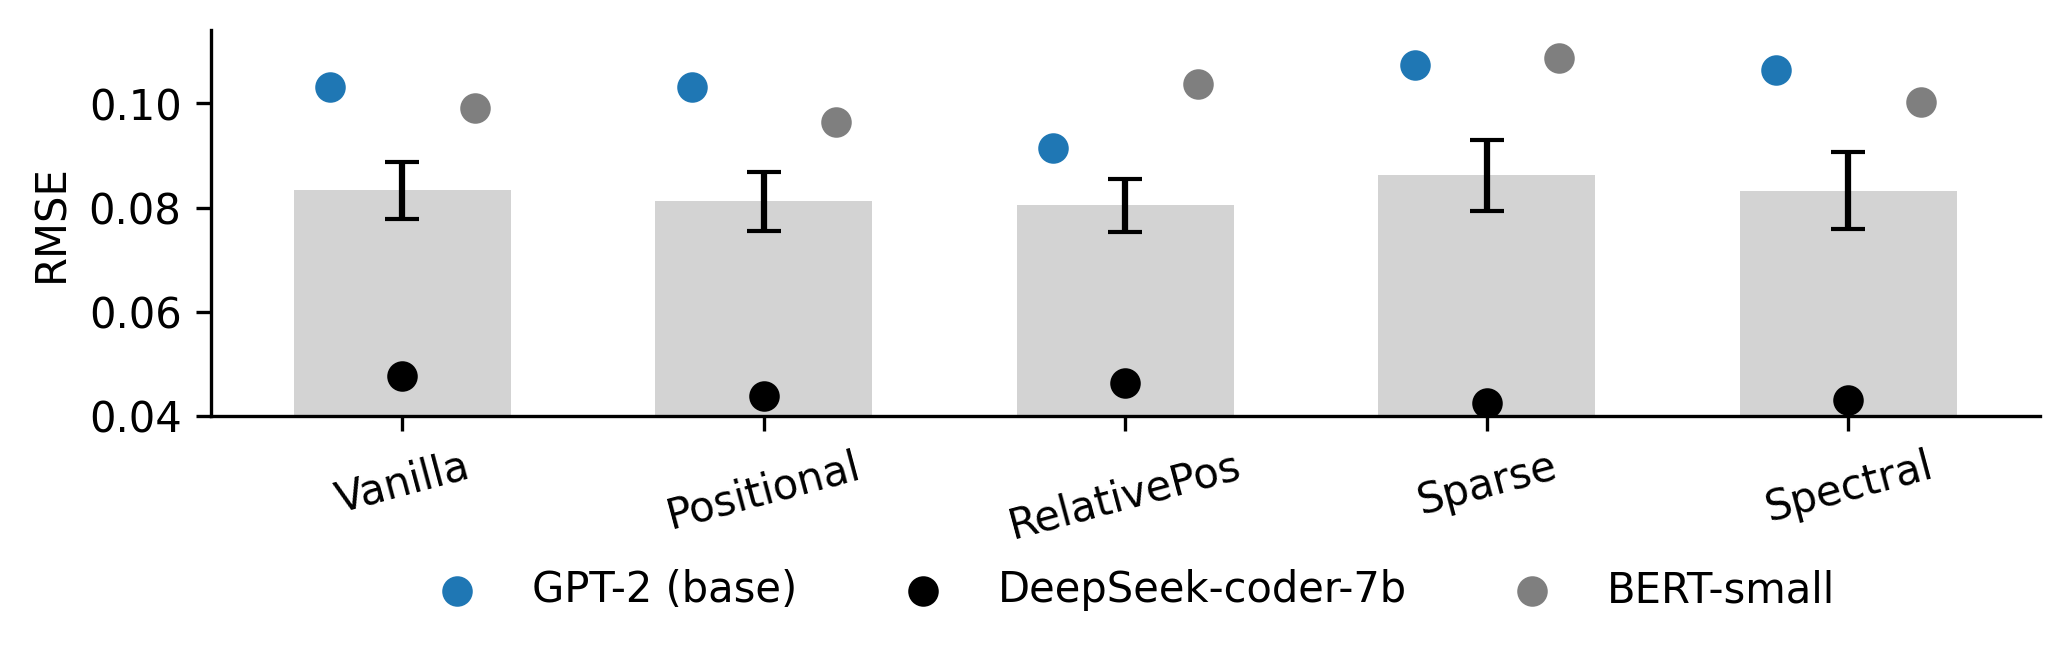

In [5]:
import os 
import glob 
import numpy as np 
import matplotlib .pyplot as plt 
from scipy .stats import sem ,wilcoxon 

ROOT =os .path .abspath (
os .path .join (os .getcwd (),os .pardir ,os .pardir ,os .pardir ,
"external_data","nlp4neuro","results_april30",
"experiment3_results")
)
RUNS =range (1 ,11 )
EMB_STRATS =["Vanilla","Positional","RelativePos","Sparse","Spectral"]
MODEL_INFO ={
"GPT-2 (base)":{"stub":"gpt2","c":"#1f77b4"},
"DeepSeek-coder-7b":{"stub":"deepseek","c":"#000000"},
"BERT-small":{"stub":"bert","c":"#7f7f7f"},
}

for gt in ("final_predictions_groundtruth_test.npy","groundtruth_test.npy"):
    fp =os .path .join (ROOT ,gt )
    if os .path .isfile (fp ):
        y_true =np .load (fp )
        break 
else :
    raise FileNotFoundError ("ground-truth test array not found")

rmse ={emb :{m :[]for m in MODEL_INFO }for emb in EMB_STRATS }

for run in RUNS :
    run_dir =os .path .join (ROOT ,f"run_{run}")
    if not os .path .isdir (run_dir ):
        continue 
    for m ,info in MODEL_INFO .items ():
        fam_dir =os .path .join (run_dir ,f"{info['stub']}_embedding_comparisons")
        for emb in EMB_STRATS :
            pred_fp =os .path .join (
            fam_dir ,
            emb .lower (),
            f"{info['stub']}_{emb.lower()}_preds_run{run}.npy"
            )
            if os .path .isfile (pred_fp ):
                preds =np .load (pred_fp )
                rmse_val =np .sqrt (np .mean ((preds -y_true )**2 ))
                rmse [emb ][m ].append (rmse_val )

pooled ={emb :np .concatenate ([rmse [emb ][m ]for m in MODEL_INFO ])for emb in EMB_STRATS }

pooled_means ={emb :pooled [emb ].mean ()for emb in EMB_STRATS }
pooled_sems ={emb :sem (pooled [emb ])for emb in EMB_STRATS }

model_means ={
emb :{m :np .mean (rmse [emb ][m ])for m in MODEL_INFO }
for emb in EMB_STRATS 
}

plt .rcParams ["pdf.fonttype"]=42 
fig ,ax =plt .subplots (figsize =(7 ,2.5 ),dpi =300 )

x =np .arange (len (EMB_STRATS ))
bw =0.6 

ax .bar (x ,[pooled_means [e ]for e in EMB_STRATS ],
yerr =[pooled_sems [e ]for e in EMB_STRATS ],
capsize =4 ,width =bw ,color ="lightgray",edgecolor ="none")

n_models =len (MODEL_INFO )
offsets =np .linspace (-bw /3 ,bw /3 ,n_models )
for j ,(m ,info )in enumerate (MODEL_INFO .items ()):
    xs =x +offsets [j ]
    ys =[model_means [emb ][m ]for emb in EMB_STRATS ]
    ax .scatter (xs ,ys ,color =info ["c"],label =m ,zorder =5 ,s =40 )

ax .set_xticks (x )
ax .set_xticklabels (EMB_STRATS ,rotation =15 )
ax .set_ylim (0.04 ,None )
ax .set_ylabel ("RMSE")
ax .spines ["top"].set_visible (False )
ax .spines ["right"].set_visible (False )
ax .spines ["left"].set_visible (True )
ax .spines ["bottom"].set_visible (True )

fig .subplots_adjust (bottom =0.09 )

ax .legend (
ncol =len (MODEL_INFO ),
frameon =False ,
bbox_to_anchor =(0.5 ,-0.3 ),
loc ="upper center"
)

print ("\nPairwise Wilcoxon signed-rank p-values (pooled across models):")
for i in range (len (EMB_STRATS )):
    for j in range (i +1 ,len (EMB_STRATS )):
        e1 ,e2 =EMB_STRATS [i ],EMB_STRATS [j ]
        data1 ,data2 =pooled [e1 ],pooled [e2 ]
        if len (data1 )==len (data2 )and len (data1 )>0 :
            stat ,p =wilcoxon (data1 ,data2 )
            print (f"{e1:12s} vs {e2:12s}: p = {p:.4e}")
        else :
            print (f"{e1:12s} vs {e2:12s}: insufficient data")

out =os .path .join (ROOT ,"final_plots_and_stats",
"embeddings_pooled_models.pdf")
plt .tight_layout ()
plt .savefig (out ,dpi =300 ,transparent =True ,bbox_inches ="tight")
print ("Saved plot to:",out )


## 3c)

Figure saved to: figures\barplot_random_by_model.pdf

Pooled-transformer Mann–Whitney U p-values  (condition = random):
Vanilla     vs Positional : p = 8.883e-01
Vanilla     vs RelativePos: p = 1.260e-01
Vanilla     vs Sparse     : p = 2.939e-01
Vanilla     vs Spectral   : p = 5.201e-01
Positional  vs RelativePos: p = 2.398e-01
Positional  vs Sparse     : p = 2.116e-01
Positional  vs Spectral   : p = 5.793e-01
RelativePos vs Sparse     : p = 1.628e-02
RelativePos vs Spectral   : p = 5.493e-01
Sparse      vs Spectral   : p = 1.055e-01

Within-model Mann–Whitney U p-values:

  GPT2:
    Vanilla     vs Positional : p = 9.698e-01 
    Vanilla     vs RelativePos: p = 1.726e-02 **
    Vanilla     vs Sparse     : p = 2.263e-01 
    Vanilla     vs Spectral   : p = 7.337e-01 
    Positional  vs RelativePos: p = 1.133e-02 **
    Positional  vs Sparse     : p = 7.566e-02 
    Positional  vs Spectral   : p = 9.698e-01 
    RelativePos vs Sparse     : p = 3.298e-04 **
    RelativePos vs Spectral   

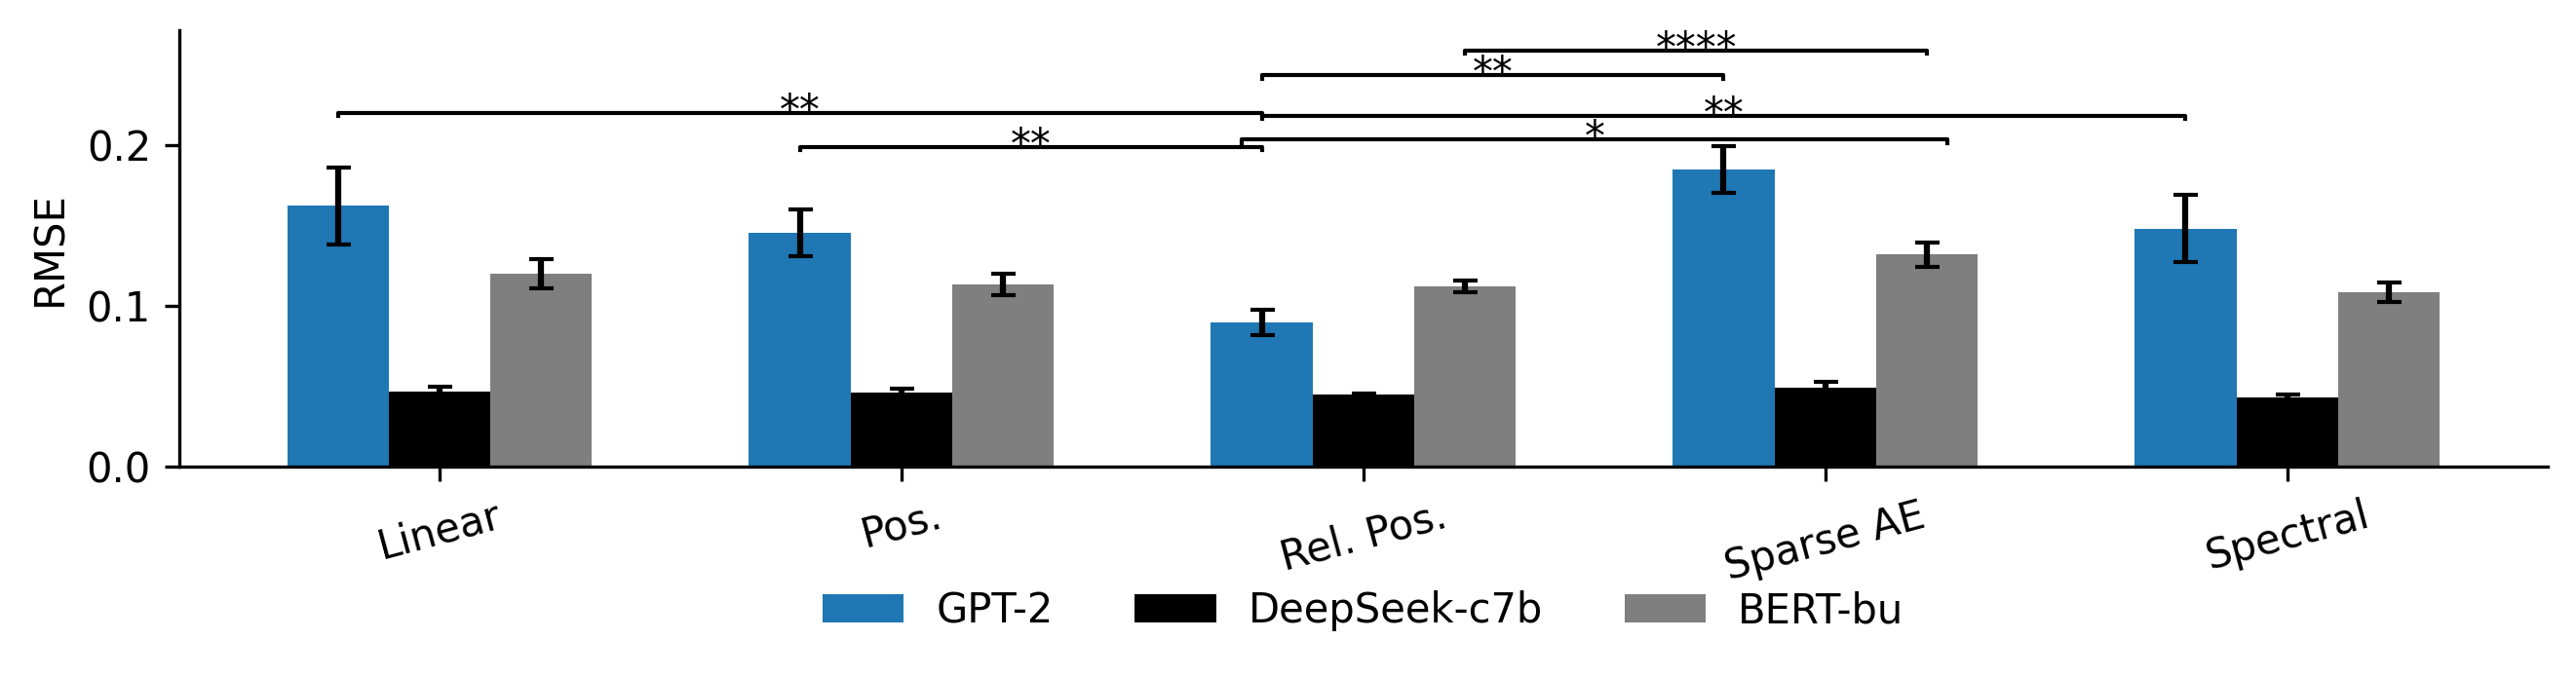

In [136]:
import re 
import itertools 
import numpy as np 
import matplotlib .pyplot as plt 
from scipy .stats import mannwhitneyu ,sem 
from pathlib import Path 

LOGFILE ="salient_random_logs.txt"
OUTDIR =Path ("figures")
OUTDIR .mkdir (exist_ok =True )

EMBEDS =["Vanilla","Positional","RelativePos","Sparse","Spectral"]
MODELS =["gpt2","deepseek","bert"]
COLORS =dict (
gpt2 ="#1f77b4",
deepseek ="#000000",
bert ="#7f7f7f"
)
DISPLAY =dict (
gpt2 ="GPT-2",
deepseek ="DeepSeek-c7b",
bert ="BERT-bu"
)
COND_TO_PLOT ="random"
alpha =0.05 

cond_pat =re .compile (r"━━\s+(salient50_removed|random50_removed)")
arrow_pat =re .compile (r"→\s+([A-Za-z0-9]+)\s+\+\s+([A-Za-z0-9]+)")
summary_pat =re .compile (r"^\s+RMSE\s+([0-9.]+)$")

by_mod ={
cond :{emb :{model :[]for model in MODELS }for emb in EMBEDS }
for cond in ("salient","random")
}

cur_cond =cur_model =cur_emb =None 
with open (LOGFILE ,encoding ='utf-8',errors ='replace')as f :
    for line in f :
        m =cond_pat .search (line )
        if m :
            cur_cond ="salient"if "salient"in m .group (1 )else "random"
            continue 
        m =arrow_pat .search (line )
        if m :
            cur_model =m .group (1 ).lower ()
            raw_emb =m .group (2 )
            cur_emb ="RelativePos"if raw_emb .lower ()=="relativepos"else raw_emb .capitalize ()
            continue 
        m =summary_pat .match (line )
        if m and cur_cond and cur_model and cur_emb :
            by_mod [cur_cond ][cur_emb ][cur_model ].append (float (m .group (1 )))

means =np .array ([
[np .mean (by_mod [COND_TO_PLOT ][emb ][model ])for model in MODELS ]
for emb in EMBEDS 
])
errs =np .array ([
[sem (by_mod [COND_TO_PLOT ][emb ][model ])for model in MODELS ]
for emb in EMBEDS 
])
pooled ={
emb :sum ((by_mod [COND_TO_PLOT ][emb ][m ]for m in MODELS ),[])
for emb in EMBEDS 
}

pair_pvals ={}
for i ,j in itertools .combinations (range (len (EMBEDS )),2 ):
    _ ,p =mannwhitneyu (
    pooled [EMBEDS [i ]],
    pooled [EMBEDS [j ]],
    alternative ="two-sided"
    )
    pair_pvals [(i ,j )]=p 

fig ,ax =plt .subplots (figsize =(9 ,2.5 ),dpi =300 )
x =np .arange (len (EMBEDS ))
bw =0.22 

for m_idx ,model in enumerate (MODELS ):
    xs =x +(m_idx -1 )*bw 
    ax .bar (xs ,
    means [:,m_idx ],
    yerr =errs [:,m_idx ],
    width =bw ,
    color =COLORS [model ],
    capsize =3 ,
    label =DISPLAY [model ])

ax .set_xticks (x )
ax .set_xticklabels (
["Linear","Pos.","Rel. Pos.","Sparse AE","Spectral"],
rotation =15 
)
ax .set_ylabel ("RMSE")
ax .spines ["top"].set_visible (False )
ax .spines ["right"].set_visible (False )
ax .legend (
ncol =3 ,
frameon =False ,
loc ="upper center",
bbox_to_anchor =(0.5 ,-0.20 )
)

h =0.002 
pad =-h *6 
stack_sep =h *2.5 

tops_emb =[max (means [i ]+errs [i ])for i in range (len (EMBEDS ))]
pooled_stack =0 

for (i ,j ),p in pair_pvals .items ():
    if p <alpha :
        y0 =max (tops_emb [i ],tops_emb [j ])
        y =y0 +h +pooled_stack *stack_sep 

        x0 =i -1.2 *bw 
        x1 =j +1.2 *bw 

        ax .plot ([x0 ,x0 ,x1 ,x1 ],
        [y ,y +h ,y +h ,y ],
        color ="k",lw =1 )
        ax .text ((x0 +x1 )/2 ,
        y +h +pad ,
        '*',
        ha ='center',va ='bottom',color ="k")

        pooled_stack +=1 

base_offset =pooled_stack +5 
stacks_by_model ={m_idx :0 for m_idx in range (len (MODELS ))}
star_map ={0 :"**",1 :"***",2 :"****"}

for m_idx ,model in enumerate (MODELS ):
    for i ,j in itertools .combinations (range (len (EMBEDS )),2 ):
        data_i =by_mod [COND_TO_PLOT ][EMBEDS [i ]][model ]
        data_j =by_mod [COND_TO_PLOT ][EMBEDS [j ]][model ]
        _ ,p =mannwhitneyu (data_i ,data_j ,alternative ="two-sided")
        if p <alpha :

            x0 =i +(m_idx -1 )*bw 
            x1 =j +(m_idx -1 )*bw 

            top_i =means [i ,m_idx ]+errs [i ,m_idx ]
            top_j =means [j ,m_idx ]+errs [j ,m_idx ]
            y0 =max (top_i ,top_j )

            model_base =base_offset +(m_idx *8.5 )
            offset =model_base +stacks_by_model [m_idx ]
            y =y0 +h +offset *stack_sep 

            ax .plot ([x0 ,x0 ,x1 ,x1 ],
            [y ,y +h ,y +h ,y ],
            color ="k",lw =1 )

            ax .text ((x0 +x1 )/2 ,
            y +h +pad ,
            star_map [m_idx ],
            ha ='center',va ='bottom',color ="k")

            stacks_by_model [m_idx ]+=1 

fig .tight_layout ()
out_pdf =OUTDIR /"barplot_random_by_model.pdf"
fig .savefig (out_pdf ,transparent =True ,bbox_inches ="tight")
print ("Figure saved to:",out_pdf )

print (f"\nPooled-transformer Mann–Whitney U p-values  (condition = {COND_TO_PLOT}):")
for (i ,j ),p in pair_pvals .items ():
    print (f"{EMBEDS[i]:11s} vs {EMBEDS[j]:11s}: p = {p:.3e}")

print ("\nWithin-model Mann–Whitney U p-values:")
for m_idx ,model in enumerate (MODELS ):
    print (f"\n  {model.upper()}:")
    for i ,j in itertools .combinations (range (len (EMBEDS )),2 ):
        _ ,p =mannwhitneyu (
        by_mod [COND_TO_PLOT ][EMBEDS [i ]][model ],
        by_mod [COND_TO_PLOT ][EMBEDS [j ]][model ],
        alternative ="two-sided"
        )
        sig =star_map [m_idx ]if p <alpha else ""
        print (f"    {EMBEDS[i]:11s} vs {EMBEDS[j]:11s}: p = {p:.3e} {sig}")
